In [10]:
#load data
import pandas as pd

data=pd.read_csv("train.csv")

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
y=data.pop("label")
y=to_categorical(y)
x_train, x_val, y_train, y_val=train_test_split(data,y,test_size=0.2)
x_train=np.array(x_train/256,dtype=np.float32)
x_val=np.array(x_val/256,dtype=np.float32)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, Activation, Input, concatenate, Reshape

# Define input shape

inputs = Input(shape=(784,))
matrix_inputs=Reshape((28,28,1))(inputs)

# Part 1
part_1 = Conv2D(4, (3, 3), activation='relu',padding="same")(matrix_inputs)
part_1 = Dropout(0.3)(part_1)
part_1 = MaxPooling2D(pool_size=(2, 2))(part_1)
part_1 = Conv2D(8, (3, 3), activation='relu',padding="same")(part_1)
part_1 = Dropout(0.3)(part_1)
part_1 = MaxPooling2D(pool_size=(2, 2))(part_1)

# Part 2
part_2 = Conv2D(8, (3, 3), activation='relu',padding="same")(matrix_inputs)
part_2 = Dropout(0.3)(part_2)
part_2 = MaxPooling2D(pool_size=(2, 2))(part_2)

# Part 3
part_3 = matrix_inputs

# Combine the 3 parts
combined = concatenate([Flatten()(part_1), Flatten()(part_2), Flatten()(part_3)])
output = Dropout(0.3)(combined)
output = Dense(32, activation='relu')(output)

# Output layer
output = Dense(10, activation='softmax')(output)

# Define the model
NN_model = tf.keras.models.Model(inputs=inputs, outputs=output)


NN_model.compile(loss="categorical_crossentropy", optimizer="rmsprop",metrics=[keras.metrics.CategoricalAccuracy()],)

In [20]:
NN_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 reshape_3 (Reshape)            (None, 28, 28, 1)    0           ['input_5[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 28, 28, 4)    40          ['reshape_3[0][0]']              
                                                                                                  
 dropout_8 (Dropout)            (None, 28, 28, 4)    0           ['conv2d_6[0][0]']               
                                                                                            

In [14]:
History=NN_model.fit(x_train, y_train, batch_size=128,epochs=60,validation_data=(x_val, y_val))

Epoch 1/60
263/263 [==============================] - 9s 33ms/step - loss: 0.4373 - categorical_accuracy: 0.8735 - val_loss: 0.2282 - val_categorical_accuracy: 0.9379
Epoch 2/60
263/263 [==============================] - 9s 34ms/step - loss: 0.1718 - categorical_accuracy: 0.9481 - val_loss: 0.1414 - val_categorical_accuracy: 0.9630
Epoch 3/60
263/263 [==============================] - 9s 35ms/step - loss: 0.1281 - categorical_accuracy: 0.9606 - val_loss: 0.1460 - val_categorical_accuracy: 0.9605
Epoch 4/60
263/263 [==============================] - 9s 35ms/step - loss: 0.1055 - categorical_accuracy: 0.9671 - val_loss: 0.1021 - val_categorical_accuracy: 0.9732
Epoch 5/60
263/263 [==============================] - 9s 36ms/step - loss: 0.0926 - categorical_accuracy: 0.9710 - val_loss: 0.1069 - val_categorical_accuracy: 0.9699
Epoch 6/60
263/263 [==============================] - 10s 36ms/step - loss: 0.0820 - categorical_accuracy: 0.9746 - val_loss: 0.0921 - val_categorical_accuracy: 0.97

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


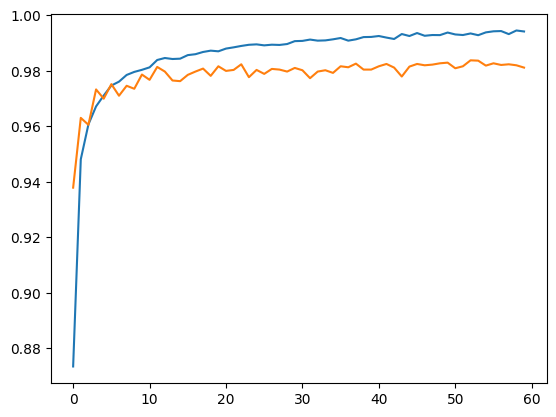

In [15]:
#visualizing
print(History.history.keys())
import matplotlib.pyplot as plt
plt.plot(History.history["categorical_accuracy"])
plt.plot(History.history["val_categorical_accuracy"])


In [16]:
History=NN_model.fit(data, y, batch_size=128,epochs=50)

Epoch 1/50
329/329 [==============================] - 14s 40ms/step - loss: 8.1471 - categorical_accuracy: 0.9886
Epoch 2/50
329/329 [==============================] - 13s 41ms/step - loss: 6.8520 - categorical_accuracy: 0.9890
Epoch 3/50
329/329 [==============================] - 13s 39ms/step - loss: 5.3505 - categorical_accuracy: 0.9884
Epoch 4/50
329/329 [==============================] - 13s 39ms/step - loss: 5.3923 - categorical_accuracy: 0.9887
Epoch 5/50
329/329 [==============================] - 13s 40ms/step - loss: 4.7216 - categorical_accuracy: 0.9891
Epoch 6/50
329/329 [==============================] - 14s 43ms/step - loss: 4.9240 - categorical_accuracy: 0.9887
Epoch 7/50
329/329 [==============================] - 14s 43ms/step - loss: 4.1613 - categorical_accuracy: 0.9890
Epoch 8/50
329/329 [==============================] - 14s 43ms/step - loss: 4.0097 - categorical_accuracy: 0.9890
Epoch 9/50
329/329 [==============================] - 14s 43ms/step - loss: 3.8719 - cat

dict_keys(['loss', 'categorical_accuracy'])


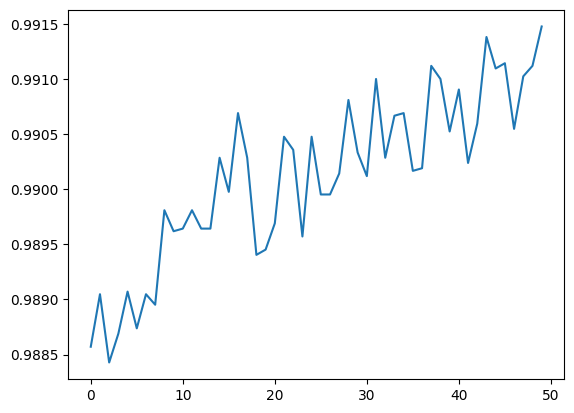

In [17]:
#visualizing
print(History.history.keys())
import matplotlib.pyplot as plt
plt.plot(History.history["categorical_accuracy"])

In [18]:
test=pd.read_csv("test.csv")
result=NN_model.predict(test)
output=[]
imid=[]
for i in range(len(result)):
    output.append(np.argmax(result[i]))
    imid.append(i+1)
print(output)
submission={"ImageId":imid,"Label":output}
submission=pd.DataFrame(submission)
submission.to_csv("sample_submission copy.csv", index=False)

875/875 [==============================] - 3s 4ms/step
[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7, 8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 9, 9, 2, 3, 5, 4, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4, 0, 9, 2, 0, 7, 3, 0, 5, 0, 8, 0, 0, 4, 7, 1, 7, 1, 1, 3, 3, 3, 7, 2, 8, 6, 3, 8, 7, 8, 4, 3, 5, 6, 0, 0, 0, 3, 1, 3, 6, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6, 5, 3, 7, 5, 7, 8, 3, 0, 4, 5, 1, 2, 7, 6, 3, 0, 2, 7, 8, 6, 1, 3, 7, 4, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7, 6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 8, 2, 1, 6, 3, 4, 2, 3, 1, 2, 2, 0, 4, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 3, 8, 6, 8, 6, 2, 8, 5, 5, 4, 8, 3, 5, 9, 7, 1, 3, 8, 4, 5, 1, 4, 5, 6, 3, 3, 5, 7, 0, 6, 8, 3, 1, 6, 0, 6, 3, 9, 5, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3, 7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6, 9, 8, 2, 6, 3, 7, 1, 4, 5, 8, 5, 9, 0, 0,